### Data Preparation Notebook

This notebook is designed to explore and preprocess the dataset for model training. It performs feature extraction, and other preparation steps to ensure the data is in the correct format for model training.

- **Optional**: Since the preprocessed data is already saved as `data.csv`, running this notebook is not mandatory.
- **Usage**: If you wish to rerun the data preparation steps, ensure you have the **Data** folder (from the challenge) uploaded before executing the notebook.


In [2]:
import pandas as pd
import os

In [3]:
# get current directory
CURRENT_DIR = os.getcwd()

In [4]:
# get data path
DATA_PATH = os.path.join(CURRENT_DIR, 'Data')
DATA_FILE = 'PATH TO DATA FOLDER.xlsx'
DATASET_DIR = 'dataset-source-codes'
DATA_FILE_PATH = os.path.join(DATA_PATH, DATA_FILE)

In [5]:
# read data
data = pd.read_excel(DATA_FILE_PATH)

In [6]:
# check one example
data[data['coding_problem_id']=='source_code_050']

,coding_problem_id,llm_answer_id,plagiarism_score
300,source_code_050,gpt-3.5-turbo_00,0.1
301,source_code_050,gpt-3.5-turbo_01,0.1
302,source_code_050,gpt-4_00,0.1
303,source_code_050,gpt-4_01,0.1
304,source_code_050,gpt-4-turbo_00,0.1
305,source_code_050,gpt-4-turbo_01,0.1


In [7]:
def get_files(coding_problem_id):
    """
    Get all the files from the dataset directory using the coding problem id

    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id

    Returns:
    -------
    files: list
        List of files in the dataset directory
    """

    if isinstance(coding_problem_id, int):
        code_source_name = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        code_source_name = coding_problem_id
    
    # get all the files from the dataset directory for the coding problem id
    dataset_dir = os.path.join(DATA_PATH, DATASET_DIR, code_source_name)
    files = os.listdir(dataset_dir)
    return files

In [8]:
# open the file and read the content
def read_file(coding_problem_id, file_name):
    """
    Read the content of the file, given the coding problem id and file name

    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id
    file_name: str
        The file name to read

    Returns:
    -------
    content: str
        The content of the file for the coding problem id
    """

    if isinstance(coding_problem_id, int):
        code_source_name = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        code_source_name = coding_problem_id

    # read the content of the file
    dataset_dir = os.path.join(DATA_PATH, DATASET_DIR, code_source_name)
    file_path = os.path.join(dataset_dir, file_name)
    with open(file_path, 'r') as file:
        content = file.read()
    return content


In [9]:
def read_file_json(coding_problem_id):
    """
    Read the content of the json file, given the coding problem id
    The json file contains information about the coding problem (question, example, etc.)

    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id

    Returns:
    -------
    content: dict
        The content of the json file for the coding problem id
    """

    # using the get_files function to get all the files and select the .json file
    files = get_files(coding_problem_id)
    json_file = [file for file in files if file.endswith('.json')]
    if not json_file:
        return None
    json_file = json_file[0]
    if isinstance(coding_problem_id, int):
        code_source_name = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        code_source_name = coding_problem_id

    dataset_dir = os.path.join(DATA_PATH, DATASET_DIR, code_source_name)
    file_path = os.path.join(dataset_dir, json_file)
    # return it as dictionary object
    return pd.read_json(file_path, orient='index').T.to_dict()


In [10]:
def read_humain_file(coding_problem_id):
    """
    Read the content of the human file, given the coding problem id
    The human file contains the human solution for the coding problem
    The file name is always the coding problem id + the extension of the file 
    without additional (gpt, etc.)
    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id

    Returns:
    -------
    content: str
        The content of the human file for the coding problem id
    """
    if isinstance(coding_problem_id, int):
        code_source_name = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        code_source_name = coding_problem_id

    dataset_dir = os.path.join(DATA_PATH, DATASET_DIR, code_source_name)
    files = os.listdir(dataset_dir)
    human_file = [file for file in files if file.startswith(code_source_name) and not file.endswith('.json')][0]
    file_path = os.path.join(dataset_dir, human_file)

    with open(file_path, 'r') as file:
        content = file.read()

    return content

In [11]:
# get the pair from the dataframe coding_problem_id and llm_answer_id

def get_pair(coding_problem_id):
    """
    Get the pair of coding problem id and llm answer id from the dataframe

    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id

    Returns:
    -------
    coding_id: str
        The coding problem id
    llm_id: str
        The llm answer id
    """

    if isinstance(coding_problem_id, int):
        coding_problem_id = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        coding_problem_id = coding_problem_id

    # get the pair from the dataframe
    filtred_dataframe = data[data['coding_problem_id']==coding_problem_id]
    coding_id = filtred_dataframe['coding_problem_id'].values[0]
    llm_id = filtred_dataframe['llm_answer_id'].values[0]

    return coding_id, llm_id

In [12]:
# get content file of the pair

def get_content(coding_problem_id):
    """
    Get the content of the json file, llm file, human file and problem question
    for the coding problem id

    Parameters:
    ----------
    coding_problem_id: int or str
        The coding problem id

    Returns:
    -------
    json_content: dict
        The content of the json file for the coding problem id
    llm_content: str
        The content of the llm file for the coding problem id
    human_content: str
        The content of the human file for the coding problem id
    problem_question: str
        The question of the coding problem id
    """

    if isinstance(coding_problem_id, int):
        coding_problem_id = 'source_code_00{}'.format(coding_problem_id) if coding_problem_id < 10 else 'source_code_0{}'.format(coding_problem_id)
    else:
        coding_problem_id = coding_problem_id
    
    # get the necessary contents
    coding_id, llm_id = get_pair(coding_problem_id)
    json_content = read_file_json(coding_id)
    files_list = get_files(coding_id)
    human_content = read_humain_file(coding_id)
    problem_question = json_content['question'][0]

    # for each file in the files_list check if llm id is in the file name
    for file in files_list:
        if llm_id in file:
            llm_content = read_file(coding_id, file)

    return json_content, llm_content, human_content, problem_question

In [13]:
# now we can add the necessary content to the dataframe

data['json_content'] = None
data['llm_content'] = None
data['human_content'] = None
data['question'] = None

for index, row in data.iterrows():
    coding_problem_id = row['coding_problem_id']
    json_content, llm_content, human_content, question = get_content(coding_problem_id)
    data.at[index, 'json_content'] = json_content
    data.at[index, 'llm_content'] = llm_content
    data.at[index, 'human_content'] = human_content
    data.at[index, 'question'] = question

In [14]:
data.head()

,coding_problem_id,llm_answer_id,plagiarism_score,json_content,llm_content,human_content,question
0,source_code_000,gpt-3.5-turbo_00,0.0,"{'ic_id': {0: 75}, 'ica_id': {0: 688}, 'questi...",public class LargestElementFinder {\n publi...,fun findLargestElement(array: IntArray) : Int ...,Write a program to find the largest element in...
1,source_code_000,gpt-3.5-turbo_01,0.0,"{'ic_id': {0: 75}, 'ica_id': {0: 688}, 'questi...",public class LargestElementFinder {\n publi...,fun findLargestElement(array: IntArray) : Int ...,Write a program to find the largest element in...
2,source_code_000,gpt-4_00,0.0,"{'ic_id': {0: 75}, 'ica_id': {0: 688}, 'questi...",public class LargestElementFinder {\n publi...,fun findLargestElement(array: IntArray) : Int ...,Write a program to find the largest element in...
3,source_code_000,gpt-4_01,0.0,"{'ic_id': {0: 75}, 'ica_id': {0: 688}, 'questi...",public class LargestElementFinder {\n publi...,fun findLargestElement(array: IntArray) : Int ...,Write a program to find the largest element in...
4,source_code_000,gpt-4-turbo_00,0.0,"{'ic_id': {0: 75}, 'ica_id': {0: 688}, 'questi...",public class LargestElementFinder {\n publi...,fun findLargestElement(array: IntArray) : Int ...,Write a program to find the largest element in...


In [15]:
data.to_csv('data.csv', index=False)

<Axes: >

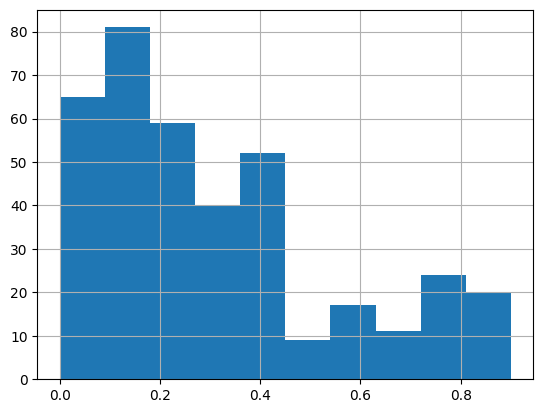

In [16]:
# distribution of the plagiarism score
data['plagiarism_score'].hist()

<Axes: >

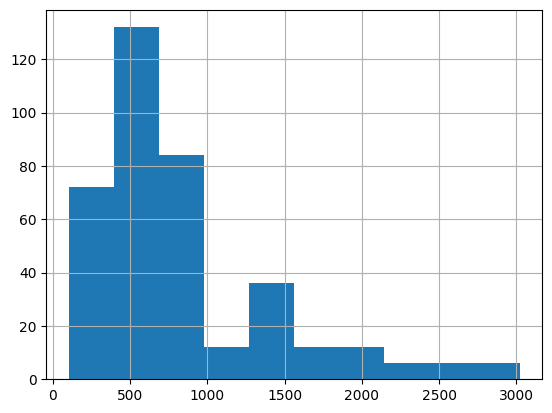

In [17]:
# distribution of the length of the llm content
data['llm_content_length'] = data['llm_content'].apply(lambda x: len(x))
data['llm_content_length'].hist()

<Axes: >

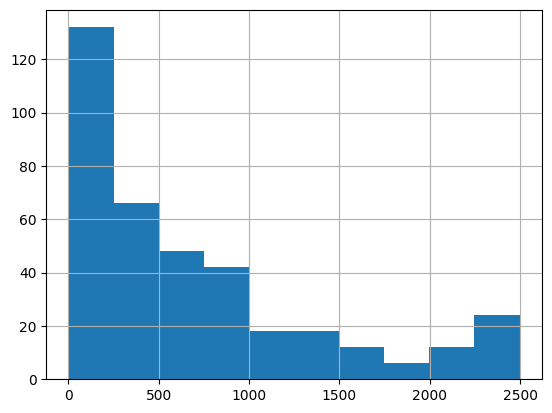

In [18]:
# distribution of the length of the human content
data['human_content_length'] = data['human_content'].apply(lambda x: len(x))
data['human_content_length'].hist()